<a href="https://colab.research.google.com/github/diegofescg/TalentoTech/blob/main/TallerGeoJson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

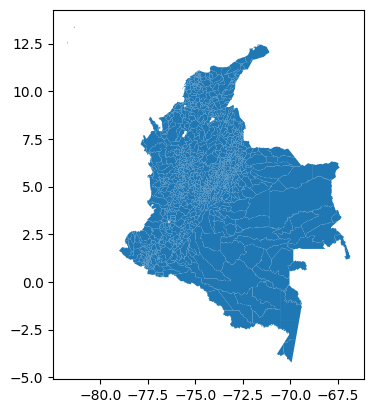

In [116]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, box, LineString
import requests

# URL pública de Google Drive para compartir
google_drive_url = "https://drive.google.com/uc?id=1rge0WctTRXHAkkdoniWlZWBzoH8v0IYn"

# Descargar el archivo
response = requests.get(google_drive_url)
with open("municipios.geojson", "wb") as f:
    f.write(response.content)

# Ruta al archivo descargado localmente
ruta_municipios = "municipios.geojson"

# Leer el archivo con GeoPandas
shapes = gpd.read_file(ruta_municipios)

# Visualizar
shapes.plot()

In [117]:
print(shapes.columns)

Index(['OBJECTID_1', 'DPTO_CCDGO', 'MPIO_CCDGO', 'Shape_Leng', 'OBJECTID',
       'MPIO_CNMBR', 'DESCRPCION', 'DEPTO', 'P_ENERSI', 'P_ENERNO',
       'P_ALCANSI', 'P_ALCANNO', 'P_ACUESI', 'P_ACUENO', 'P_GASNSI',
       'P_GASNNO', 'P_GASNNOIN', 'P_TELEFSI', 'P_TELEFNO', 'P_TELEFNOI',
       'ShapeSTArea', 'ShapeSTLength', 'geometry'],
      dtype='object')


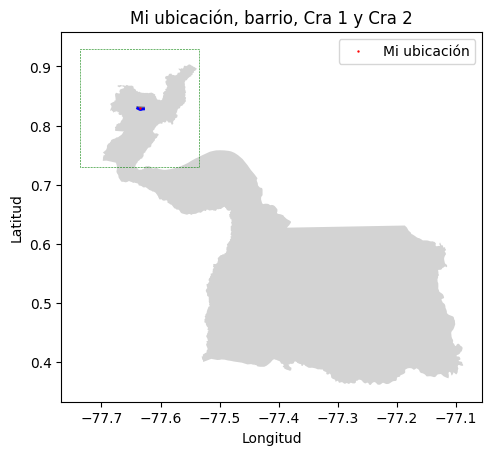

In [118]:
# Filtrando a ipiales
ipiales = shapes[shapes['MPIO_CNMBR'] == 'IPIALES']

# Coordenadas de mi casa
latitud_casa, longitud_casa = 0.829670413381175, -77.63545674974498

# Crear un punto con las coordenadas de la casa
punto_casa = Point(longitud_casa, latitud_casa)

# Coordenadas de la carrera 1A
coordenadas_cra1 = [
[
            -77.6409923622917,
            0.8307413003455366
          ],
          [
            -77.63773809897938,
            0.830449031959617
          ],
          [
            -77.63411359014036,
            0.8301762481117976
          ],
          [
            -77.62992396970779,
            0.8298644951207166
          ],
          [
            -77.62645535372248,
            0.8296891340528276
          ]
]

# Coordenadas carrera 2
coordenadas_cra2 = [
[
            -77.64042725069822,
            0.8302541863562851
          ],
          [
            -77.63884883555903,
            0.8292994427616236
          ],
          [
            -77.63654941597261,
            0.8281888223721268
          ],
          [
            -77.63479562137344,
            0.8272535628547786
          ],
          [
            -77.63323669284048,
            0.8271171708243656
          ],
          [
            -77.63159981788095,
            0.8277601617870118
          ],
          [
            -77.62941731793465,
            0.8280913995159551
          ],
          [
            -77.62633843408233,
            0.8282277915141378
          ]
]

# Coordenadas de la delimitación del barrio
coordenadas_barrio = [
[
              -77.6361226035023,
              0.8299073480244346
            ],
            [
              -77.6361226035023,
              0.8292561889740995
            ],
            [
              -77.63527896812171,
              0.8292561889740995
            ],
            [
              -77.63527896812171,
              0.8299073480244346
            ],
            [
              -77.6361226035023,
              0.8299073480244346
            ]
]

# Definir el tamaño del cuadro alrededor del punto (en grados)
tamaño_cuadro = 0.1  # Puedes ajustar este valor según sea necesario

# Crear un cuadro alrededor del punto
cuadro = box(longitud_casa - tamaño_cuadro, latitud_casa - tamaño_cuadro,
             longitud_casa + tamaño_cuadro, latitud_casa + tamaño_cuadro)

# Crear un GeoDataFrame para la cra1, cra2 y la delimitación del barrio
linea_cra1 = LineString(coordenadas_cra1)
linea_cra2 = LineString(coordenadas_cra2)
poligono_barrio = Polygon(coordenadas_barrio)
gdf_cra1_cra2_barrio = gpd.GeoDataFrame(geometry=[linea_cra1, linea_cra2, poligono_barrio])

# Crear el gráfico
fig, ax = plt.subplots()

# Trazar la zona de Ipiales
ipiales.plot(ax=ax, color='lightgrey')

# Trazar la cra1, cra2 y la delimitación del barrio
gdf_cra1_cra2_barrio.plot(ax=ax, color=['grey', 'blue', 'orange'], linewidth=2)

# Trazar el punto de la casa
ax.plot(longitud_casa, latitud_casa, 'ro', markersize=0.7, label='Mi ubicación')

# Trazar el cuadro alrededor del punto
x, y = cuadro.exterior.xy
ax.plot(x, y, color='green', linestyle='--', linewidth=0.4)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Mi ubicación, barrio, Cra 1 y Cra 2')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

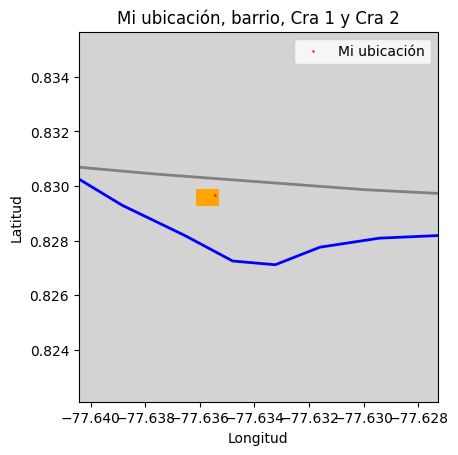

In [123]:
# Filtrando a ipiales
ipiales = shapes[shapes['MPIO_CNMBR'] == 'IPIALES']

# Coordenadas de mi casa
latitud_casa, longitud_casa = 0.829670413381175, -77.63545674974498

# Crear un punto con las coordenadas de la casa
punto_casa = Point(longitud_casa, latitud_casa)

# Coordenadas de la carrera 1A
coordenadas_cra1 = [
[
            -77.6409923622917,
            0.8307413003455366
          ],
          [
            -77.63773809897938,
            0.830449031959617
          ],
          [
            -77.63411359014036,
            0.8301762481117976
          ],
          [
            -77.62992396970779,
            0.8298644951207166
          ],
          [
            -77.62645535372248,
            0.8296891340528276
          ]
]

# Coordenadas carrera 2
coordenadas_cra2 = [
[
            -77.64042725069822,
            0.8302541863562851
          ],
          [
            -77.63884883555903,
            0.8292994427616236
          ],
          [
            -77.63654941597261,
            0.8281888223721268
          ],
          [
            -77.63479562137344,
            0.8272535628547786
          ],
          [
            -77.63323669284048,
            0.8271171708243656
          ],
          [
            -77.63159981788095,
            0.8277601617870118
          ],
          [
            -77.62941731793465,
            0.8280913995159551
          ],
          [
            -77.62633843408233,
            0.8282277915141378
          ]
]

# Coordenadas de la delimitación del barrio
coordenadas_barrio = [
[
              -77.6361226035023,
              0.8299073480244346
            ],
            [
              -77.6361226035023,
              0.8292561889740995
            ],
            [
              -77.63527896812171,
              0.8292561889740995
            ],
            [
              -77.63527896812171,
              0.8299073480244346
            ],
            [
              -77.6361226035023,
              0.8299073480244346
            ]
]

# Definir el tamaño del cuadro alrededor del punto (en grados)
tamaño_cuadro = 0.9  # Puedes ajustar este valor según sea necesario

# Crear un cuadro alrededor del punto
cuadro = box(longitud_casa - tamaño_cuadro, latitud_casa - tamaño_cuadro,
             longitud_casa + tamaño_cuadro, latitud_casa + tamaño_cuadro)

# Crear un GeoDataFrame para la calle, el río Cauca y la delimitación del barrio
linea_cra1 = LineString(coordenadas_cra1)
linea_cra2 = LineString(coordenadas_cra2)
poligono_barrio = Polygon(coordenadas_barrio)
gdf_cra1_cra2_barrio = gpd.GeoDataFrame(geometry=[linea_cra1, linea_cra2, poligono_barrio])

# Crear el gráfico
fig, ax = plt.subplots()

# Trazar la zona de Popayán
ipiales.plot(ax=ax, color='lightgrey')

# Trazar la calle, el río Cauca y la delimitación del barrio
gdf_cra1_cra2_barrio.plot(ax=ax, color=['grey', 'blue', 'orange'], linewidth=2)

# Trazar el punto de la casa
ax.plot(longitud_casa, latitud_casa, 'ro', markersize=0.7, label='Mi ubicación')

# Trazar el cuadro alrededor del punto
x, y = cuadro.exterior.xy
ax.plot(x, y, color='green', linestyle='--', linewidth=0.4)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Mi ubicación, barrio, Cra 1 y Cra 2')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Establecer los límites de los ejes para hacer zoom
ax.set_xlim([-77.64042885628164, -77.62728467528287])  # Ajusta estos valores según sea necesario
ax.set_ylim([0.8220996613952991, 0.8356383346219616])  # Ajusta estos valores según sea necesario

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [120]:
# Crear un objeto Point con las coordenadas de tu casa
punto_casa = Point(longitud_casa, latitud_casa)

# Agregar el punto de la casa al GeoDataFrame
gdf_cra1_cra2_barrio.loc[len(gdf_cra1_cra2_barrio)] = [punto_casa]

# Guardar el GeoDataFrame actualizado en formato GeoJSON
gdf_cra1_cra2_barrio.to_file("archivo_salida_con_casa.geojson", driver='GeoJSON')

# Imprimir un mensaje de confirmación
print("El archivo se ha guardado correctamente como 'archivo_salida_con_casa.geojson' con las coordenadas de tu casa incluidas.")


El archivo se ha guardado correctamente como 'archivo_salida_con_casa.geojson' con las coordenadas de tu casa incluidas.
